In [1]:
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadLog(path):
    sawHeader = False
    dataLines = []
    sortingPoints="TimeSorting"
    with open(path) as file:
        for line in file:
            if line.startswith("Sort points Time elapsed") or line.startswith("Sorting points Time elapsed"):
                sortingPoints = line.split(":")[1].replace("ms", "")
            
            if not line.startswith("[DATA]"):
                continue
                
            line = line[6:] # remove tag
            looksLikeHeader = "n" in line
            
            if sawHeader:
                if looksLikeHeader:
                    continue
            else:
                assert(looksLikeHeader)
                sawHeader = True
                
            
            dataLines.append(line.replace(" ", "")[:-1] + "," + sortingPoints)
            sortingPoints = ""
            
    buffer = StringIO("\n".join(dataLines))
    return pd.read_csv(buffer)
                
data = loadLog("hyper_manyoga.log")




avgDeg=10, alpha=0.750 T=0.000


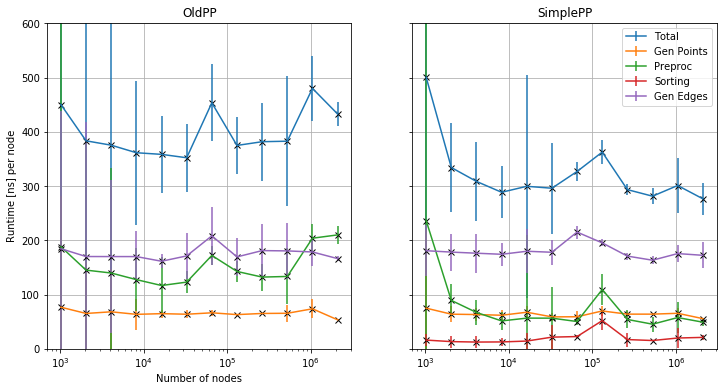



avgDeg=100, alpha=0.750 T=0.000


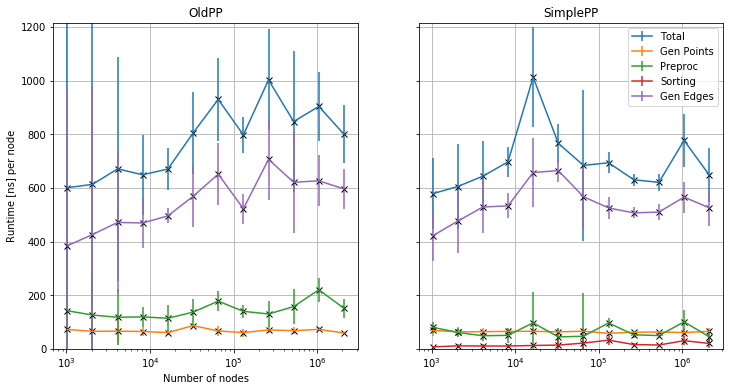



avgDeg=1000, alpha=0.750 T=0.000


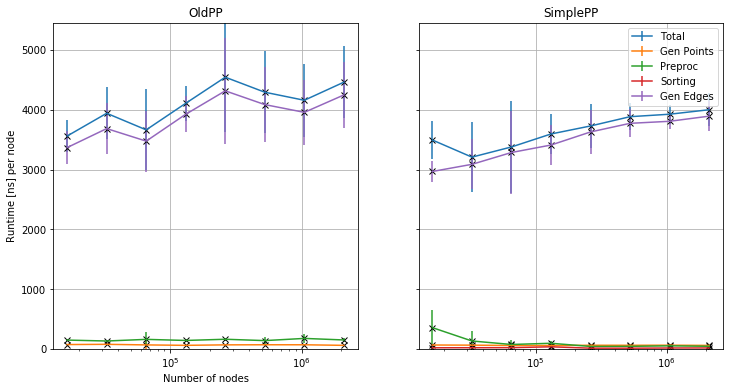

In [3]:
def ploteb(view, valueIndex, legend="", keyIndex = "n", ax = plt):
    xs = view[keyIndex].median()
    ys = view[valueIndex].median() / xs * 1e6
    yerr = view[valueIndex].std() / xs * 1e6
    
    ax.plot(xs, ys, "xk", label="")
    ax.errorbar(xs, ys, yerr, label=legend)
    
    return max(ys) if len(ys) else 0

algos = sorted(data.algo.unique())
for run, run_view in data.groupby(["avgDeg", "alpha", "T"]):
    title = "avgDeg=%d, alpha=%.3f T=%.3f" % run
    print("\n\n" + title)
    f, axs = plt.subplots(1, len(algos), sharey=True, figsize=(12,6))
    
    axs[0].set_ylabel("Runtime [ns] per node")
    axs[0].set_xlabel("Number of nodes")
    
    maxx = 0
    
    for i, algo in enumerate(algos):
        ax = axs[i]
        ax.set_title(algo)
        ax.semilogx()
        ax.grid()
        grp = run_view[run_view.algo==algo].groupby("n")
        maxx = max(maxx, ploteb(grp, "TimeTotal",   "Total", ax = ax))
        maxx = max(maxx, ploteb(grp, "TimePoints",  "Gen Points", ax = ax))
        maxx = max(maxx, ploteb(grp, "TimePrepro",  "Preproc", ax = ax))
        maxx = max(maxx, ploteb(grp, "TimeSorting", "Sorting", ax = ax))
        maxx = max(maxx, ploteb(grp, "TimeEdges",   "Gen Edges", ax = ax))
        
    axs[0].set_ylim(0, 1.2*maxx)
    
    plt.legend()
        
    plt.show()
        


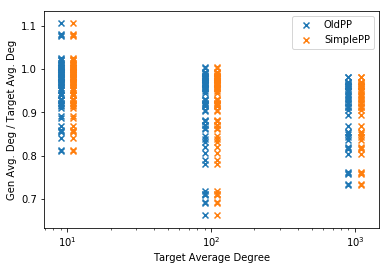

In [4]:
plt.semilogx()
plt.xlabel("Target Average Degree")
plt.ylabel("Gen Avg. Deg / Target Avg. Deg")
for i, (algo, view) in enumerate(data.groupby("algo")):
    plt.scatter(view.avgDeg * (0.9 + 0.2 * i),
                view.GenAvgDeg / view.avgDeg,
                marker="x",
                label=algo)
    
plt.legend()
plt.show()